### The goal is to predict the dependent variable Churn, 1 indicate that customers ahve left, 0 means stay back

In [1]:
import pandas as pd
import numpy as np

In [3]:
data1 = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [6]:
# check for missing values
data1.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# drop missing value
data1.dropna(inplace = True)

In [74]:
# get dummy value from categorical columns
df_dummies = pd.get_dummies(data1, drop_first = True)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


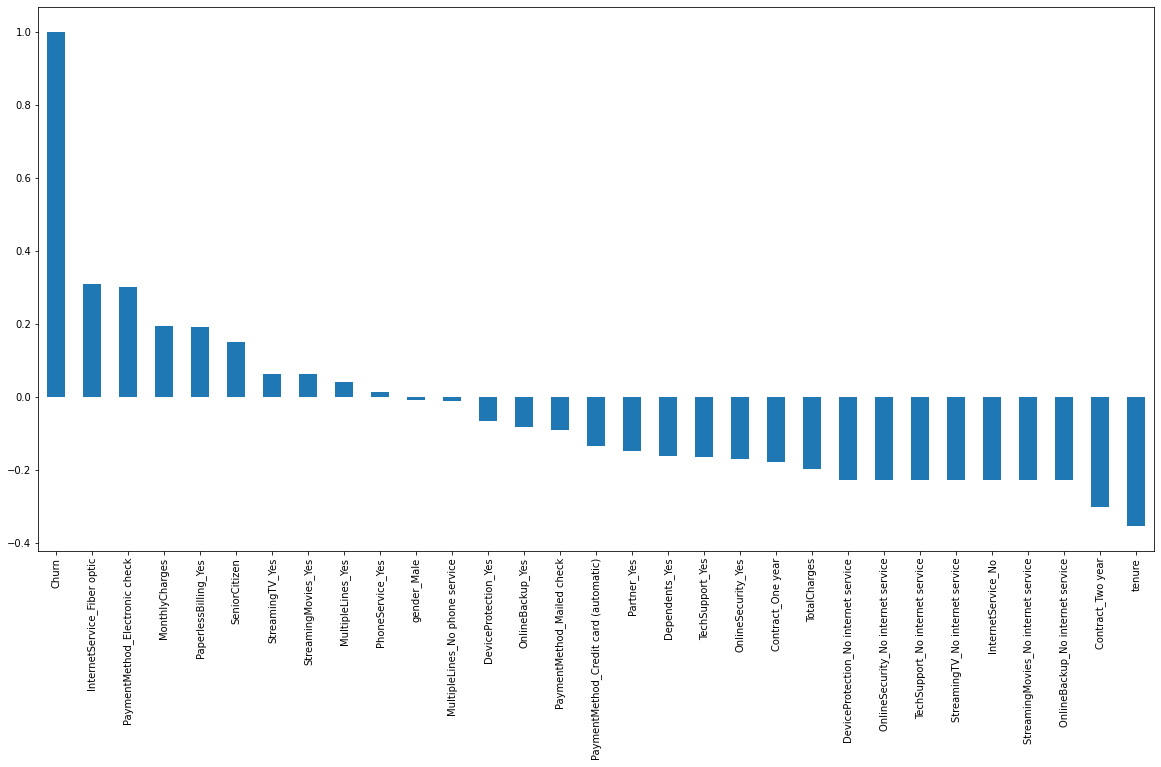

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [67]:
# our target variable is imbalanced
data1['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

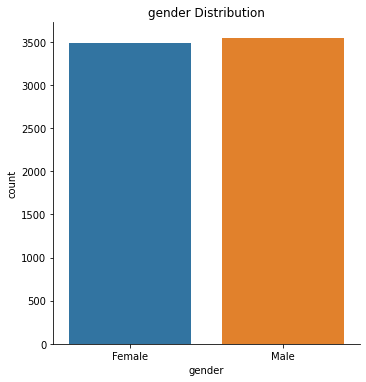

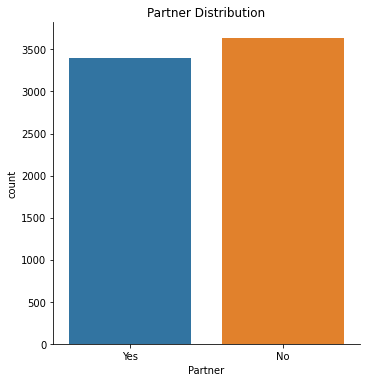

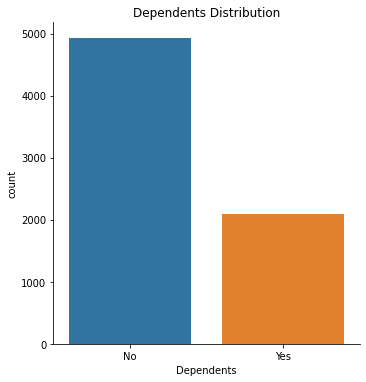

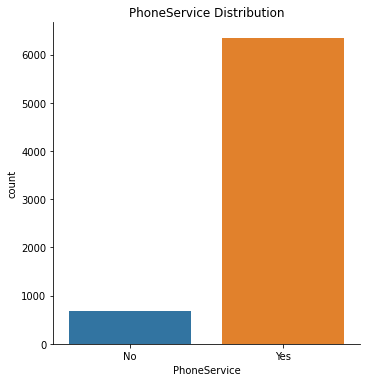

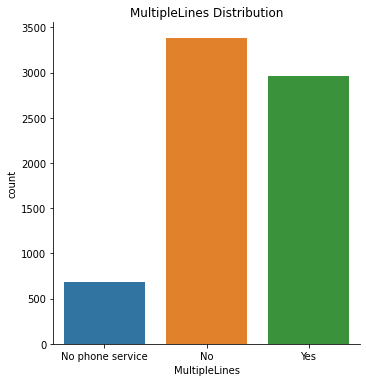

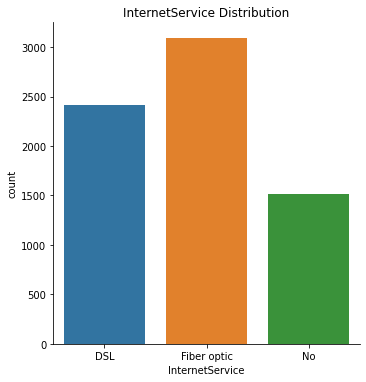

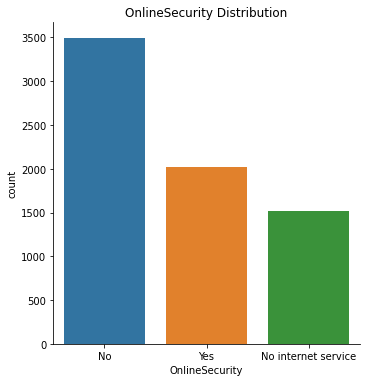

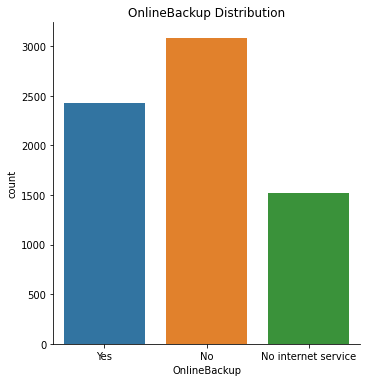

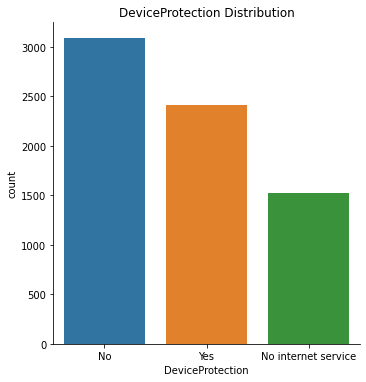

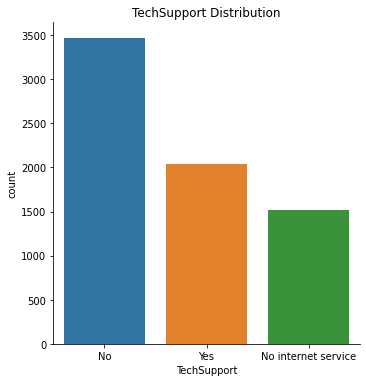

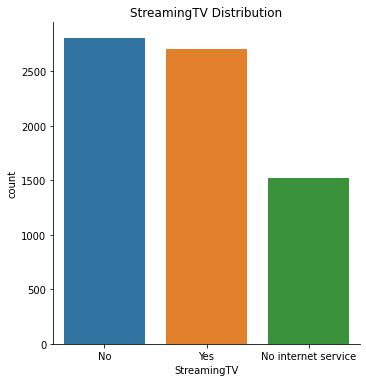

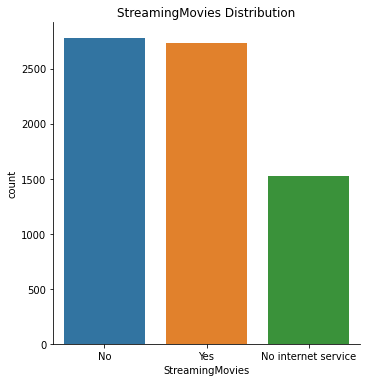

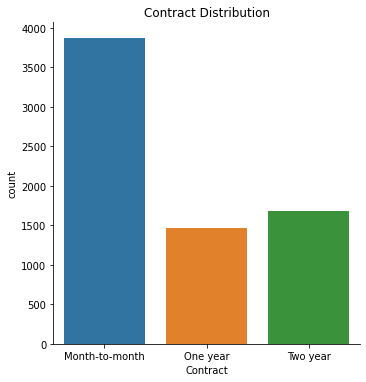

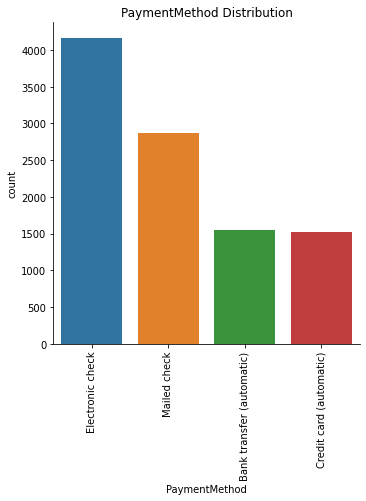

In [59]:
# get visualization for all categorical values
for col in data1.columns.to_list():
    if (data1[col].dtypes == 'object') & (col != 'PaymentMethod'):
        sns.catplot(x = col, data = data1, kind = 'count')
        plt.title('{} Distribution'.format(col))
    elif data1[col].dtypes == 'object' and col == 'PaymentMethod':
        pic = sns.countplot(x = 'PaymentMethod', data = data1)
        pic.set_xticklabels(pic.get_xticklabels(), rotation = 90)
        plt.title('{} Distribution'.format(col))
    else:
        pass
plt.show()
    

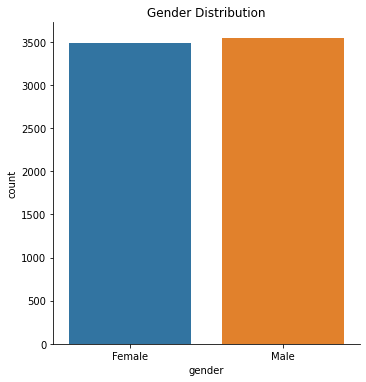

In [39]:
# gender distribution
import seaborn as sns

pic = sns.catplot(x = 'gender', data = data1, kind = 'count')
plt.title('Gender Distribution')

plt.show()
# the gender data seems balanced

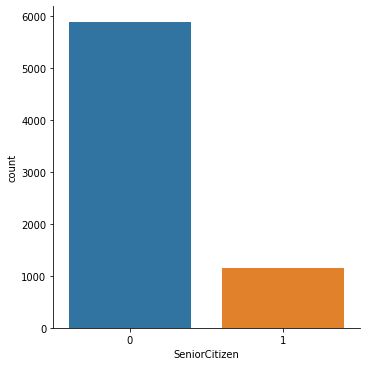

In [40]:
sns.catplot(x = 'SeniorCitizen', data = data1, kind = 'count')
plt.show()

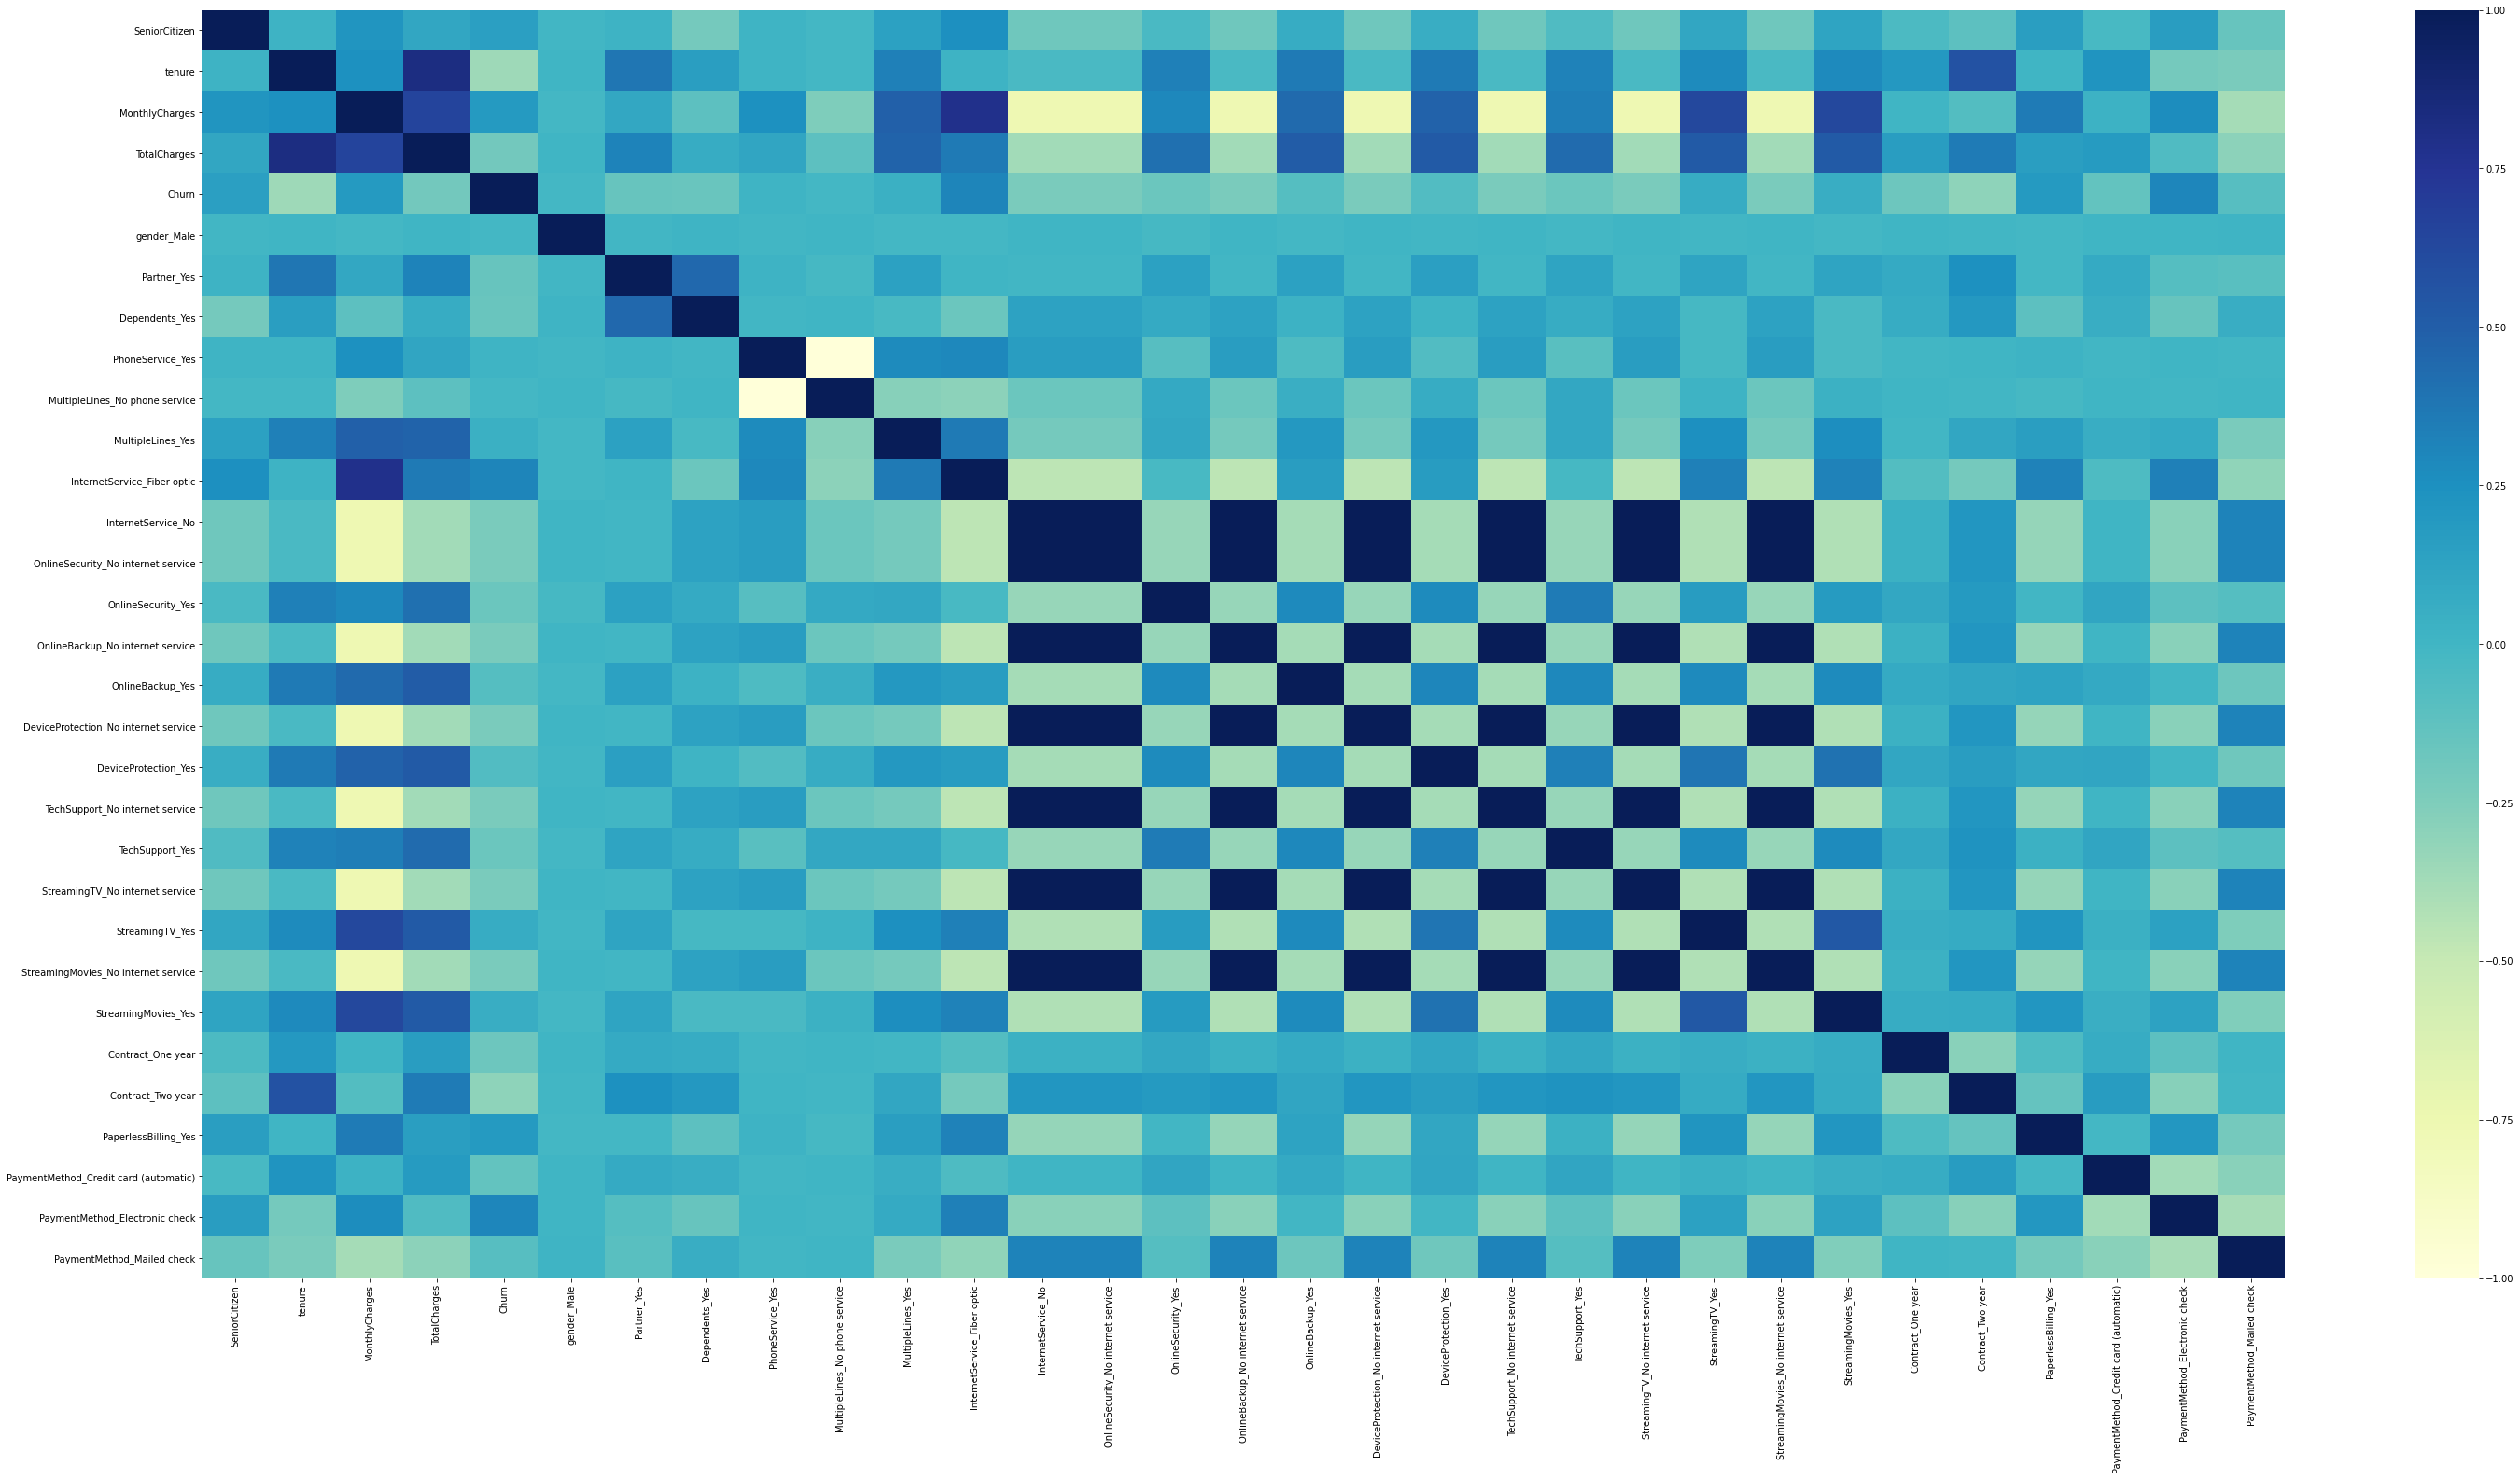

In [76]:
# get correlation
plt.figure(figsize=(50,25))
my_corr = df_dummies.corr()
sns.heatmap(my_corr, xticklabels=my_corr.columns,yticklabels=my_corr.columns, cmap = 'YlGnBu')
plt.show()

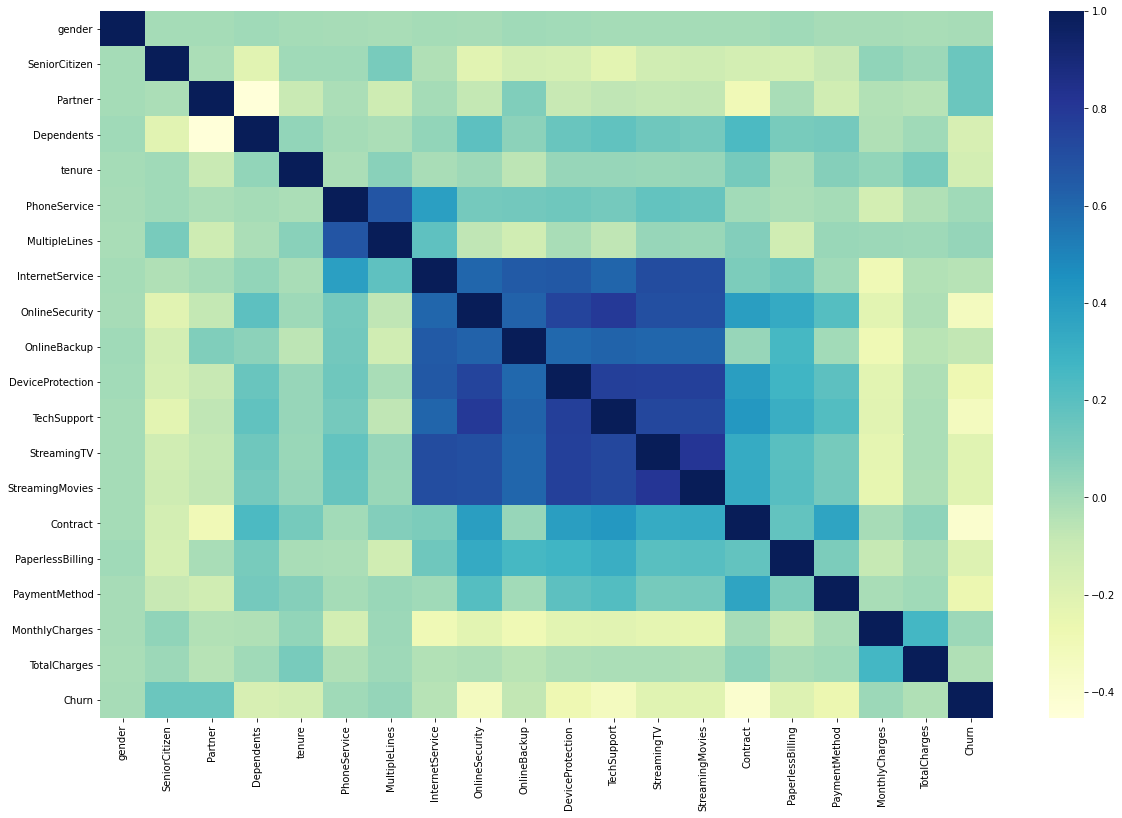

In [77]:
plt.figure(figsize=(20, 13))
my_corr = data1.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(my_corr, xticklabels=my_corr.columns,yticklabels=my_corr.columns, cmap = 'YlGnBu')
plt.show()

In [73]:
# top 10 feature with high correlation
my_corr['Churn'].sort_values(ascending = False)
# all shows weak or non-linear correlation

Churn               1.000000
SeniorCitizen       0.150541
Partner             0.149982
MultipleLines       0.036148
MonthlyCharges      0.020303
PhoneService        0.011691
gender             -0.008545
TotalCharges       -0.028994
InternetService    -0.047097
OnlineBackup       -0.073934
tenure             -0.143101
Dependents         -0.163128
PaperlessBilling   -0.191454
StreamingTV        -0.205246
StreamingMovies    -0.207150
PaymentMethod      -0.262918
DeviceProtection   -0.281048
TechSupport        -0.329474
OnlineSecurity     -0.332443
Contract           -0.396150
Name: Churn, dtype: float64

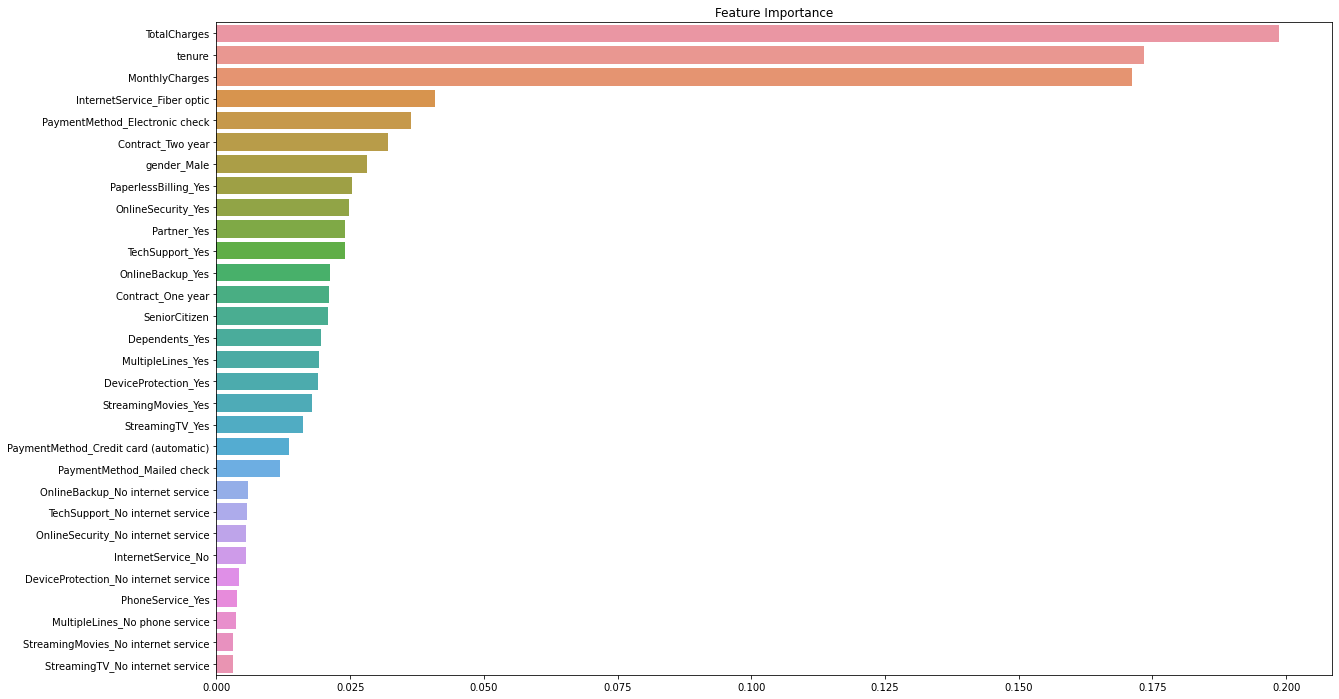

In [86]:
# using randomForest to get feature importance
from sklearn.ensemble import RandomForestClassifier
X = df_dummies.drop(['Churn'], axis = 1)
y = df_dummies['Churn']

clf = RandomForestClassifier()
clf = clf.fit(X, y)

importance = pd.Series(data = clf.feature_importances_, index = X.columns).sort_values(ascending = False)
plt.figure(figsize = (20, 12))
plt.title('Feature Importance')
ax = sns.barplot(y = importance.index, x = importance.values, orient = 'h')
plt.show()

In [88]:
# Scaling all the variables to a range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

In [90]:
# Train & Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(5625, 30)
(5625,)
(1407, 30)
(1407,)


In [94]:
y_train.value_counts()

0    4120
1    1505
Name: Churn, dtype: int64

In [93]:
# Using SMOTE to resampling data due to imbalanced issue

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_balance, y_balance = sm.fit_resample(X_train.values, y_train)
pd.DataFrame(y_balance).value_counts()

Churn
0        4120
1        4120
dtype: int64

In [95]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_balance, y_balance)

In [97]:
from sklearn import metrics

pred_y = model.predict(X_test)
print(metrics.confusion_matrix(y_test, pred_y))
print(metrics.accuracy_score(y_test, pred_y))
print(metrics.classification_report(y_test, pred_y))


[[789 254]
 [ 76 288]]
0.7654584221748401
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1043
           1       0.53      0.79      0.64       364

    accuracy                           0.77      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.77      0.78      1407

